In [1]:
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn import preprocessing
from scipy import stats
from tqdm import tqdm
import requests
import time


In [41]:
values_csv=[]
cols_drop_csv=[]
def add_to_csv_values(col,val,meaning):
  values_csv.append((col,val,meaning))
  # if col in values_csv.keys():
  #   values_csv[col].append({val:meaning})
  # else:
  #   values_csv[col]=[{val:meaning}]

def add_to_col_drop(col):
  cols_drop_csv.append(col)

In [2]:
def show_values(axs, orient="v", round = 1,space=.01):
    format = '{:.'+str(round)+'f}'
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = format.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = format.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

In [3]:
def countEachCategory(col):
  allCategories = col.unique();
  res={}
  for cat in allCategories:
    res[str(cat)]=0
  for val in col:
    res[str(val)] = res[str(val)]+1
  return res

In [4]:
def percentOfCategories(col,fun=countEachCategory,r=1):
  countDict = fun(col)
  sumAll = len(col)
  for cat in countDict:
    countDict[cat] = round((countDict[cat]/sumAll)*100, r)
  return countDict

In [5]:
def plotPercentageCol(percentOfCategories,dim1=10,dim2=5,title="",degree=0,r=1):
  fig, ax = plt.subplots(figsize=(dim1, dim2))
  keys = list(percentOfCategories.keys())
  p = sns.barplot(x=keys, y=[percentOfCategories[k] for k in keys])
  plt.title(title)
  plt.tick_params(axis='x', rotation=degree)
  show_values(p,round = r)
  plt.show()
  

In [26]:
def calculate_top_categories(df, variable, how_many):
    return [
        x for x in df[variable].value_counts().sort_values(
            ascending=False).head(how_many).index
    ]

def one_hot_encode_frequent(df, variable, how_many):
    result = df.copy()
    top_x_labels = calculate_top_categories(result, variable, how_many)
    for label in top_x_labels:
        result[variable + '_' + label] = np.where(
            result[variable] == label, 1, 0) 
    return result

In [48]:
dataSet_csv = '/content/drive/MyDrive/DE Project/output.csv'
city_csv_path = '/content/drive/MyDrive/DE Project/city.csv'
dataset_csv_res = '/content/drive/MyDrive/DE Project/output_2.csv'
lookup_path = '/content/drive/MyDrive/DE Project/values_2.csv' 

In [8]:
df= pd.read_csv(dataSet_csv,index_col=0)
df.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,longitude,latitude,number_of_vehicles,number_of_casualties,speed_limit,day,month,hour,minute,accident_severity_encoding,...,trunk_road_flag_Trunk (Roads managed by Highways England),local_authority_district_encoding,local_authority_highway_encoding,first_road_number_encoding,second_road_number_encoding,lsoa_of_accident_location_encoding,week_number_encoding,accident_in_summer,accident_in_PM,accident_on_weekend
accident_index,,,,,,,,,,,,,,,,,,,,,
201401BS70001,-0.206443,51.496345,0.75362,0.0,0.646504,9,1,13,21,0,...,0,0,0,1,0,22,0,0,1,0
201401BS70002,-0.189713,51.489523,0.75362,0.0,0.646504,20,1,23,0,0,...,0,0,0,14,14,22,0,0,1,0
201401BS70003,-0.173827,51.490536,0.75362,0.0,0.646504,21,1,10,40,0,...,0,0,0,1,0,22,0,0,0,0
201401BS70004,-0.192311,51.496668,0.00000,0.0,0.646504,15,1,17,45,0,...,0,0,0,0,0,22,0,0,1,0
201401BS70006,-0.171308,51.495892,0.75362,0.0,0.646504,9,1,8,50,0,...,0,0,0,0,0,22,0,0,0,0


In [9]:
df.columns.tolist()

['longitude',
 'latitude',
 'number_of_vehicles',
 'number_of_casualties',
 'speed_limit',
 'day',
 'month',
 'hour',
 'minute',
 'accident_severity_encoding',
 'day_of_week_Monday',
 'day_of_week_Saturday',
 'day_of_week_Sunday',
 'day_of_week_Thursday',
 'day_of_week_Tuesday',
 'day_of_week_Wednesday',
 'first_road_class_A',
 'first_road_class_A(M)',
 'first_road_class_B',
 'first_road_class_C',
 'first_road_class_Motorway',
 'road_type_Dual carriageway',
 'road_type_One way street',
 'road_type_Roundabout',
 'road_type_Single carriageway',
 'junction_detail_Not at junction or within 20 metres',
 'junction_detail_T or staggered junction',
 'junction_detail_Crossroads',
 'junction_detail_Roundabout',
 'junction_detail_Private drive or entrance',
 'junction_control_Give way or uncontrolled',
 'junction_control_Not at junction then no control',
 'junction_control_Auto traffic signal',
 'second_road_class_-1',
 'second_road_class_A',
 'second_road_class_A(M)',
 'second_road_class_B',
 's

In [10]:
df_city= pd.read_csv(city_csv_path,index_col=0)
df_city.head()

,city
accident_index,
201401BS70001,London
201401BS70002,London
201401BS70003,London
201401BS70004,London
201401BS70006,London


In [11]:
longitude = df.longitude
latitude = df.latitude
area = df.local_authority_district_encoding

In [12]:
final_city =[]
for i in range(0,len(df_city)):
  final_city.append(df_city.iloc[i].city)

In [13]:
len(final_city)

141246

##we will extract the Name of cities using api

In [14]:
ranges = [range(0,35311),range(35311,70623),range(70623,105934),range(105934,len(final_city))]
keys = ["pk.89158a3387897aa581dd09c7d14ce8a4","pk.3dcc799bdea16876359ace757caaaa7c","pk.a0952ecbc3f62eac77e6fb5f2ab65804","pk.62ab443d7a0c3a0713ebb25369618fdf"]

In [15]:
index_of_range = 0

In [16]:
keys[index_of_range]

'pk.89158a3387897aa581dd09c7d14ce8a4'

In [17]:
map = {}

In [18]:
c = 0
for i in tqdm(range(0,len(final_city))):
  if(final_city[i]=="no"):
    if(area.iloc[i] in map.keys()):
      final_city[i] = map[area.iloc[i]]
    else:
      try:
        api_url = "https://us1.locationiq.com/v1/reverse?key="+keys[index_of_range]+"&lat="+str(latitude.iloc[i])+"&lon="+str(longitude.iloc[i])+"&format=json"
        response = requests.get(api_url).json()
        add_keys = response['address'].keys()
        if('city' in add_keys):
          final_city[i] = response['address']['city']
        elif('town' in add_keys):
          final_city[i] = response['address']['town']
        elif ('county' in add_keys):
          final_city[i] = response['address']['county']
        map[area.iloc[i]] = final_city[i]
        time.sleep(1)
      except:
        time.sleep(1)
        print(response)
        c+=1
  else:
    if(not(area.iloc[i] in map.keys())):
      map[area.iloc[i]] = final_city[i]

  if(i%10000==0):
    df_city['city'] = final_city
    df_city.to_csv(city_csv_path,index=True)
df_city['city'] = final_city
df_city.to_csv(city_csv_path,index=True)
print("except",c)


100%|██████████| 141246/141246 [00:05<00:00, 27597.20it/s]


except 0


In [49]:
len(df_city['city'].unique())

324

In [20]:
df['city'] = final_city
df.to_csv(dataset_csv_res,index=True)

#Q in which city the most number of accidents happened

In [21]:
percent_number_of_cities = percentOfCategories(df.city,r=3)
percent_number_of_cities

{'London': 15.775,
 'City of London': 2.242,
 'Borough of Copeland': 0.136,
 'Allerdale': 0.186,
 'South Lakeland': 0.207,
 'Carlisle': 0.201,
 'Eden District': 0.111,
 'Barrow-in-Furness': 0.107,
 'Borough of Fylde': 0.154,
 'Borough of Wyre': 0.163,
 'Little Marton': 0.282,
 'Preston': 0.61,
 'Lancaster': 0.281,
 'Chorley': 0.197,
 'West Lancashire': 0.2,
 'Blackburn': 0.275,
 'Hyndburn': 0.143,
 'Borough of Pendle': 0.125,
 'Borough of Rossendale': 0.113,
 'Burnley': 0.161,
 'Kirkby': 0.187,
 'no': 0.001,
 'Birkenhead': 0.37,
 'Liverpool': 0.864,
 'St Helens': 0.216,
 'Litherland': 0.33,
 'Manchester': 0.704,
 'Salford': 0.484,
 'Tameside': 0.202,
 'Cheadle': 0.205,
 'Farnworth': 0.314,
 'Wigan': 0.222,
 'Bury': 0.165,
 'Rochdale': 0.222,
 'Oldham': 0.255,
 'Poynton': 0.695,
 'Ellesmere Port': 0.582,
 'Birchwood': 0.379,
 'Halton': 0.001,
 'Runcorn': 0.193,
 'Sunderland': 0.401,
 'Ashington': 0.503,
 'Newcastle upon Tyne': 0.509,
 'Gateshead': 0.349,
 'North Tyneside': 0.285,
 'Sout

In [33]:
top_10_city = calculate_top_categories(df,'city',10)
percent_number_of_cities_top = {}
for x in top_10_city:
  percent_number_of_cities_top[x] = percent_number_of_cities[x]

In [34]:
percent_number_of_cities_top

{'London': 15.775,
 'City of London': 2.242,
 'Birmingham': 1.776,
 'Leeds': 1.338,
 'Cambridgeshire': 1.056,
 'Camborne': 0.918,
 'Doncaster': 0.918,
 'Bradford': 0.869,
 'Liverpool': 0.864,
 'City of Edinburgh': 0.861}

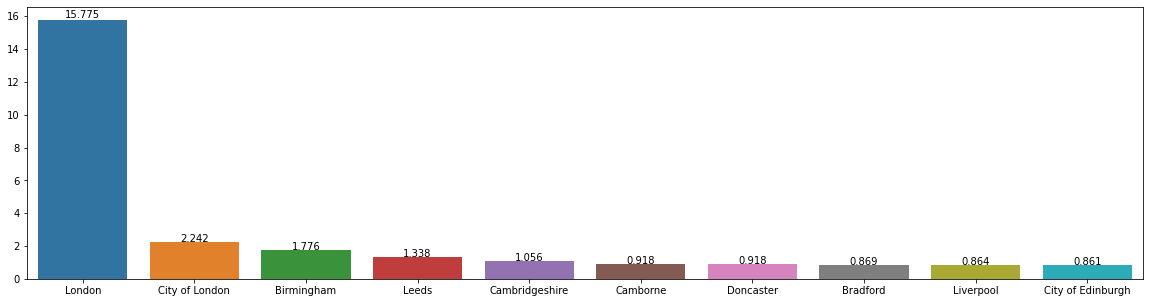

In [39]:
plotPercentageCol(percent_number_of_cities_top ,dim1=20,r=3)

### AS shown London was the city with the most number of accidents





##Q2 in which city the most number of accidents happened in first road with class A

In [36]:
df_q2 = df[df['first_road_class_A']==1]

In [37]:
percent_number_of_cities_class_A = percentOfCategories(df_q2.city,r=3)
percent_number_of_cities_class_A

{'London': 21.592,
 'City of London': 3.18,
 'Borough of Copeland': 0.113,
 'Allerdale': 0.205,
 'South Lakeland': 0.263,
 'Carlisle': 0.176,
 'Eden District': 0.118,
 'Barrow-in-Furness': 0.053,
 'Borough of Fylde': 0.131,
 'Borough of Wyre': 0.137,
 'Little Marton': 0.235,
 'Preston': 0.444,
 'Lancaster': 0.241,
 'Chorley': 0.128,
 'West Lancashire': 0.186,
 'Blackburn': 0.202,
 'Hyndburn': 0.101,
 'Borough of Pendle': 0.107,
 'Borough of Rossendale': 0.137,
 'Burnley': 0.122,
 'no': 0.002,
 'Birkenhead': 0.285,
 'Kirkby': 0.142,
 'St Helens': 0.192,
 'Litherland': 0.34,
 'Liverpool': 0.829,
 'Manchester': 0.733,
 'Salford': 0.464,
 'Tameside': 0.188,
 'Cheadle': 0.203,
 'Farnworth': 0.302,
 'Wigan': 0.234,
 'Bury': 0.159,
 'Rochdale': 0.218,
 'Oldham': 0.244,
 'Ellesmere Port': 0.609,
 'Birchwood': 0.333,
 'Poynton': 0.647,
 'Halton': 0.002,
 'Runcorn': 0.142,
 'Ashington': 0.585,
 'Gateshead': 0.29,
 'Sunderland': 0.386,
 'Newcastle upon Tyne': 0.45,
 'South Tyneside': 0.185,
 'Nor

In [38]:
top_10_city_class_A = calculate_top_categories(df_q2,'city',10)
percent_number_of_cities_top_class_A = {}
for x in top_10_city_class_A:
  percent_number_of_cities_top_class_A[x] = percent_number_of_cities_class_A[x]

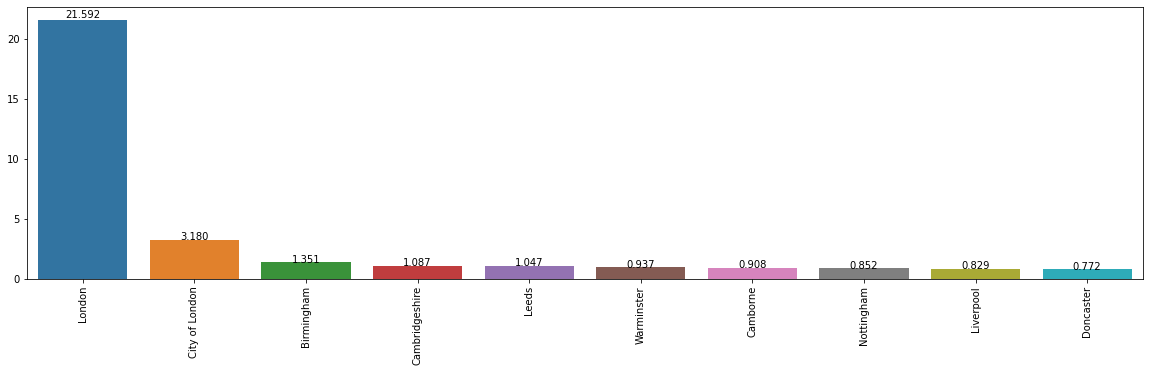

In [40]:
plotPercentageCol(percent_number_of_cities_top_class_A ,dim1=20,r=3,degree=90)

### AS shown also London was the city with the most number of accidents when the first road was class A


###city encoded with label encoding methed the feature not ordinal but it has huge number of unique values so one hot encoding will consume huge memory space. The percentage of unique values almost have no differance so we can not use freqent version of one hot encoding


In [42]:
def number_encode_features(df,feature,mapping):
    result = df.copy() # take a copy of the dataframe
    map = []
    for x in df[feature]:
      map.append(mapping[x])
    result[feature+'_encoding'] = np.array(map)
    return result

In [43]:
def generateLabelsMapping(df,feature):
  x = df[feature].unique()
  map = {}
  n = 0
  for i in x:
    map[i] = n
    n+=1
  return map


In [44]:
def add_mapping_to_csv(feature,mapping):
  for k in mapping.keys():
    add_to_csv_values(feature+'_encoding',mapping[k],k)


In [45]:
df = number_encode_features(df,'city',generateLabelsMapping(df,'city'))

In [46]:
add_mapping_to_csv('city',generateLabelsMapping(df,'city'))
add_to_col_drop('city')

In [49]:
df = df.drop(cols_drop_csv,axis=1)
np.savetxt(lookup_path, values_csv, delimiter=',', fmt=['"%s"' , '"%s"', '"%s"'], header='column,value,meaning', comments='')

In [ ]:
df.to_csv(dataset_csv_res,index=True)